In [1]:
# The usual imports

%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import math

# Function: for an n-length vector x

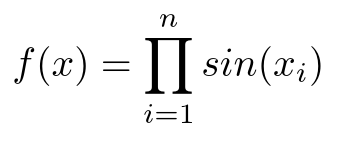

In [2]:
from IPython.display import Image
Image('profilerfunction.png')

In [3]:
# Sine product for N dimensions on a grid between lower and upper

def sin_product(lower, upper, grid):

    for point in np.ndindex(grid.shape):
        r = 1.0
        for i, v in enumerate(point):
            xp = [0, grid.shape[i]]
            fp = [lower, upper]
            r *= np.sin(np.interp(v, xp, fp))
        grid[point] = r

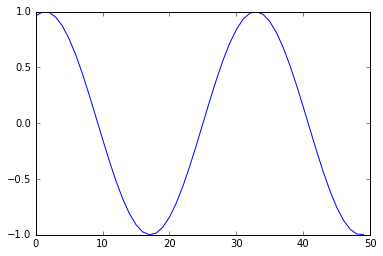

In [4]:
# Quick demo of function

# One dimension

grid1 = np.zeros(50)
sin_product(-5, 5, grid1)

plt.plot(grid1)

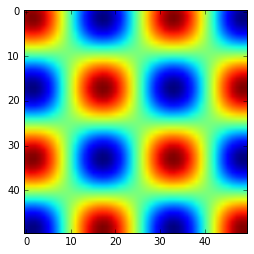

In [5]:
# Two dimensions

grid2 = np.zeros((50, 50))
sin_product(-5, 5, grid2)

plt.imshow(grid2)

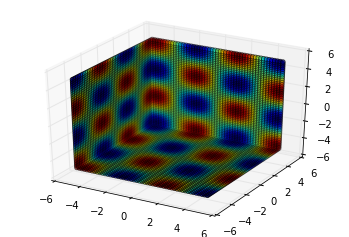

In [6]:
# Three dimensions

grid3 = np.zeros((50, 50, 50))
sin_product(-5, 5, grid3)

# Some extra setup for plotting

from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

x = np.linspace(-5, 5, 50)
y = np.linspace(-5, 5, 50)
z = np.linspace(-5, 5, 50)

x, y, z = np.meshgrid(x, y, z)

ax.scatter(x, y, z, c=grid3)
plt.show()

The data profiler has a similar API to the standard library profiler:

In [7]:
# Create profiler object

from accelerate import profiler
p = profiler.Profile()

ImportError: No module named 'accelerate'

In [ ]:
# Profile execution of the function
#
# Same function, three different sets of arguments

def sinmulti():
    grid1 = np.zeros(50)
    grid2 = np.zeros((50, 50))
    grid3 = np.zeros((50, 50, 50))
    
    sin_product(-5, 5, grid1)
    sin_product(-5, 5, grid2)
    sin_product(-5.0, 5.0, grid3)

p.run('sinmulti()')

In [ ]:
# Print out the profile

p.print_stats()

In [ ]:
# Plot the profile

profiler.plot(p)